# Something something big data on plane crashes woooo yeeeaaaaaaaaaah!!
                                            ##### Jupyter Notebook coded by Allison Ward, Rick Lataille, and Anthony Mansion

In [2]:
#Import the modules we need
import pandas as pd
import numpy as np

# And this is the big data that we will be using
df = pd.read_csv('Aviation_Data.csv', low_memory=False)

/var/folders/r7/dkcrrdg1099bt6wjv8tr4trc0000gn/T/ipykernel_45245/2519711930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Here, we will be dropping columns we see no need for, the information isn't relevant.

In [3]:
# Drop the columns we know that we don't need
dropped_columns = ['Schedule', 'Report.Status', 'Publication.Date']
df.drop(columns = dropped_columns, inplace=True)
print(f"{len(df)} items.")

90348 items.


## As for the columns we DO need, we filter some columns for the information we need.

In [4]:
# Convert date column to datetime, then filter event dates to include 2013 and later
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df_filtered = df.loc[df['Event.Date'] >= '2013-01-01']
print(f"{len(df_filtered)} items.")

15829 items.


In [5]:
# Filter aircraft categories for Airplanes only
df_filtered = df_filtered.loc[df_filtered['Aircraft.Category'] == 'Airplane']
print(f"{len(df_filtered)} items.")

13262 items.


In [6]:
# Exclude Amateur-built planes
df_filtered = df_filtered.loc[df_filtered['Amateur.Built'] != 'Yes']
print(f"{len(df_filtered)} items.")

11726 items.


In [7]:
# Include only events that happened in the United States or US Territories
allowed_countries = ['United States']
df_filtered = df_filtered.loc[df_filtered['Country'].isin(allowed_countries)]
print(f"{len(df_filtered)} items.")

9465 items.


In [8]:
# Exclude certain identified purposes as irrelevant to our stakeholder
allowed_purposes = ['Personal', np.nan, 'Business', 'Executive/corporate', \
                    'Positioning', 'Other Work Use', 'Ferry', 'Unknown', 'Public Aircraft - Federal', \
                   'Public Aircraft - State', 'Public Aircraft - Local', 'Public Aircraft', 'PUBS']
df_filtered = df_filtered.loc[df_filtered['Purpose.of.flight'].isin(allowed_purposes)]
print(f"{len(df_filtered)} items.")

7320 items.


In [9]:
df_filtered.to_csv('Filtered_Aviation_Data.csv', index=False)

In [10]:
#Converting latitude and longitude from Degrees, Minutes, and Seconds to Decimal Degrees

df_filtered.dropna(subset=['Latitude', 'Longitude'], inplace=True)

def convert_latitude(x):
    degrees = float(x[:2])
    minutes = float(x[2:4])
    seconds = float(x[4:6])
    return degrees + minutes/60 + seconds/3600

df_filtered["new_lats"] = df_filtered['Latitude'].map(convert_latitude)

def convert_longitude(x):
    degrees = float(x[:3])
    minutes = float(x[3:5])
    seconds = float(x[5:7])
    return -(degrees + minutes/60 + seconds/3600)

df_filtered["new_longs"] = df_filtered['Longitude'].map(convert_longitude)

In [11]:
# Separating the city and state from the Location column and creating a new column for the state (from https://www.kaggle.com/code/tetianalys605/aviation-accidents-python-analysis)

df_filtered['State'] = df_filtered['Location'].str.split(',').str[1]

In [12]:
#Getting the top 15 states with the most incidents in our data set
df_filtered['State'].value_counts(ascending = False).head(15)

State
AK    706
CA    678
TX    589
FL    500
AZ    235
CO    230
GA    223
WA    202
ID    187
NC    184
NY    170
PA    169
OR    158
OH    154
MI    153
Name: count, dtype: int64

In [13]:
# Taking a look at weather conditions
df_filtered['Weather.Condition'].value_counts()

Weather.Condition
VMC    6456
IMC     448
Unk      95
Name: count, dtype: int64

In [39]:
# Determining the states with the highest number of incidents under VMC conditions

state_VMC = df_filtered['State'].loc[df_filtered['Weather.Condition'] == 'VMC']
top_15_state_VMC = state_VMC.value_counts().head(15)
top_15_state_VMC

State
AK    636
CA    602
TX    517
FL    453
AZ    216
CO    201
GA    191
WA    179
ID    176
NC    159
PA    152
NY    146
OR    141
OH    139
MI    134
Name: count, dtype: int64

In [38]:
# Determining the states with the highest number of incidents under IMC conditions
state_IMC = df_filtered['State'].loc[df_filtered['Weather.Condition'] == 'IMC']
top_15_state_IMC = state_IMC.value_counts().head(15)
top_15_state_IMC

State
TX    39
AK    33
FL    26
CA    23
GA    23
NC    18
TN    16
NY    15
IL    14
CO    14
MN    13
VA    12
WI    12
MI    12
MO    11
Name: count, dtype: int64

In [16]:
# Looking at fatality counts per state
state_fatality = df_filtered['State'].loc[df_filtered['Injury.Severity'] == 'Fatal']
state_fatality_top_15 = state_fatality.value_counts().head(15)
state_fatality_top_15

State
CA    149
TX    101
FL     91
AK     73
GA     55
CO     37
NC     34
AZ     33
NY     30
OH     28
MI     28
TN     26
NM     25
OR     25
IL     25
Name: count, dtype: int64

In [17]:
# Looking at non-fatality counts per state
state_non_fatality = df_filtered['State'].loc[df_filtered['Injury.Severity'] != 'Fatal']
state_non_fatality_top_15 = state_non_fatality.value_counts().head(15)
state_non_fatality_top_15

State
AK    633
CA    529
TX    488
FL    409
AZ    202
CO    193
WA    178
GA    168
ID    164
PA    152
NC    150
NY    140
OR    133
OH    126
MI    125
Name: count, dtype: int64

In [57]:
#Switching Event Date column to pandas date time
df_filtered['Event.Date'] = pd.to_datetime(df_filtered['Event.Date'])

In [58]:
# Creating a new column with Day of Week
df_filtered['Day_Of_Week'] = df['Event.Date'].dt.day_name()

In [35]:
# Finding percentages of value counts in the Day_of_Week column
day_of_week = df_filtered['Day_Of_Week'].value_counts(normalize = True) * 100
day_of_week

Day_Of_Week
Saturday     19.003968
Sunday       16.951703
Friday       14.694213
Thursday     13.175537
Monday       12.888220
Wednesday    12.464085
Tuesday      10.822274
Name: proportion, dtype: float64

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

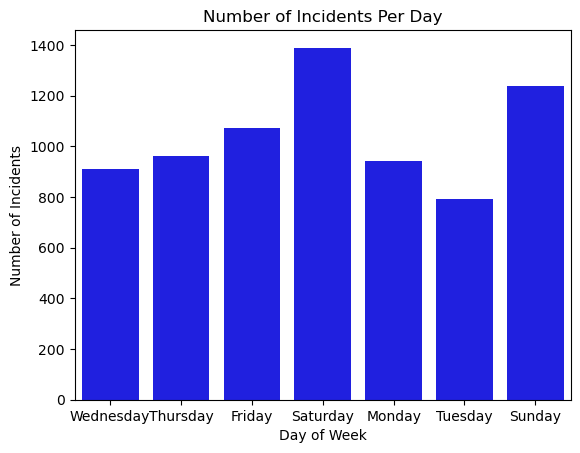

In [61]:
# Plotting Number of Incidents per Day of the Week
plot = sns.countplot(x = 'Day_Of_Week', color = 'b', data = df_filtered)
plot.set(xlabel = 'Day of Week', ylabel = 'Number of Incidents', title = 'Number of Incidents Per Day');